# Using SKR with sklearn library to estimate damped oscillator

### import libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### libraries for kernels with sk-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel

### General system for damped oscillator
$
\ddot{x}(t) + 2\zeta\omega_0 \dot{x}(t) + \omega_0^2 x(t) = 0
$

#### Description of variables:
- $ x(t) $: position 
- $ \dot{x}(t) $: Velocity 
- $ \ddot{x}(t) $: acceleration
- $ \zeta $: The damping factor, which determines how quickly the oscillations decay (due to friction or resistance).
- $ \omega_0 $: The natural frequency of the system (egenfrekvens)
- $ t $: Time unit.


In [22]:
def damped_oscillator(t, y):  #remember that independent value t comes first
    zeta = 1*0.2/np.sqrt(2)
    omega_0 = 0.2 * 2* np.pi
    y_dot = - 2* zeta * omega_0 * y[1] - omega_0**2 * y[0] # x'' = -2*z*w0*x' - w0^2 * x rewritten as a system of first order 
    return [y[1], y_dot]  #y[1] = velocity and y_dot = acceleration. return both since system is rewritten as 2 first order diffs.

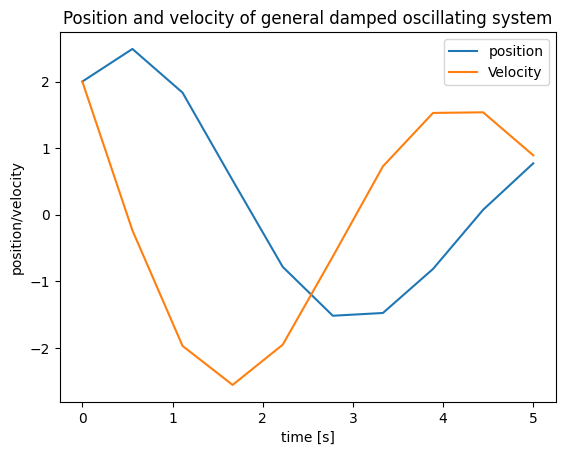

In [23]:
sol = solve_ivp(damped_oscillator, (0, 5), (2, 2), t_eval = np.linspace(0, 5, 10))#time interval first, then initial values for position and velocity
t = sol.t
x,y  = sol.y        #sol.y contains solutions for position and velocity calculated over t_eval as a 2d array

plt.plot(t, x, label = "position")
plt.plot(t, y, label = "Velocity")
plt.xlabel("time [s]")
plt.ylabel("position/velocity")
plt.title("Position and velocity of general damped oscillating system")
plt.legend()
plt.show()

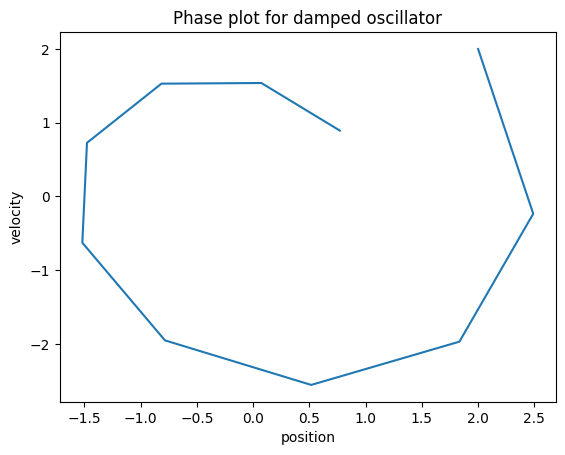

In [24]:
plt.plot(x, y)
plt.xlabel("position")
plt.ylabel("velocity")
plt.title("Phase plot for damped oscillator")
plt.show()

### For the Undamped Pendulum

$$
\ddot{\theta}(t) + \frac{g}{L} \sin(\theta(t)) = 0
$$

#### Description of Variables:
- **$\theta(t)$**: The angle of the pendulum as a function of time
- **$\dot{\theta}(t)$**: The angular velocity
- **$\ddot{\theta}(t)$**: The angular acceleration 
- **$g$**: The acceleration due to gravity
- **$L$**: The length of the pendulum
- **$t$**: Time


### Simulert data for hastighet og posisjon med støy

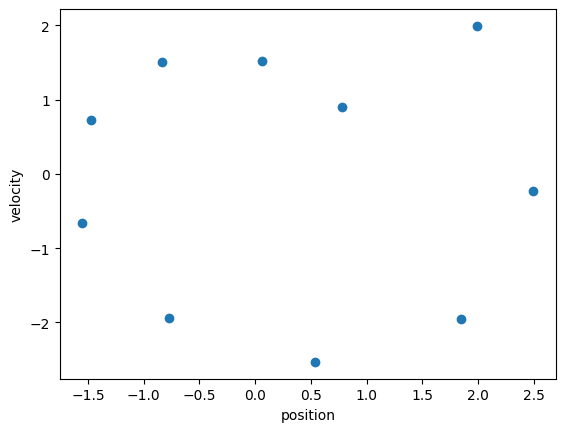

In [25]:
pos_data = x[::]
vel_data = y[::]
gaussian_noise = np.random.normal(0, 0.02, len(pos_data))
pos_data = pos_data + gaussian_noise
vel_data = vel_data + gaussian_noise
pos_data = np.column_stack((t, pos_data))
plt.plot(pos_data[:, 1], vel_data, 'o')
plt.xlabel("position")
plt.ylabel("velocity")
plt.show()

### Del inn i test og train set og standardiser dataen


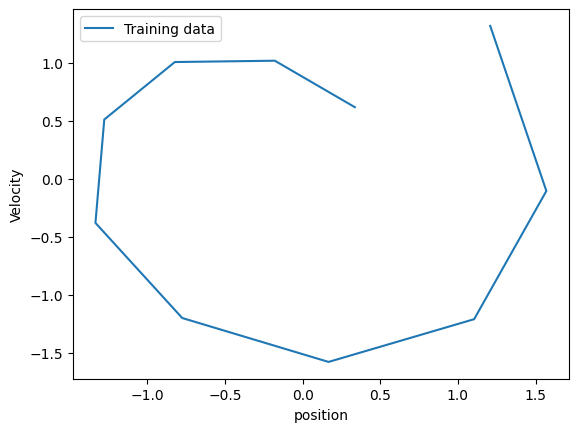

In [35]:
x_train = pos_data
y_train = np.reshape(vel_data, (-1, 1))

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(y_train)

plt.plot(x_train[:,1].reshape(-1,1), y_train, label="Training data")
plt.xlabel("position")
plt.ylabel("Velocity")
plt.legend()
plt.show()

### lager SVR  for the systemet

C:\Users\emila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


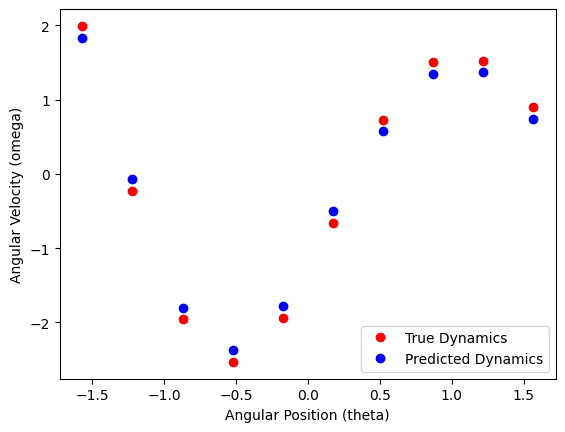

In [36]:
svr =  SVR(kernel = 'rbf', C=10, gamma = 10)

svr.fit(x_train, y_train)

y_pred = svr.predict(x_train)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1))
#x_train = scaler_x.inverse_transform(x_train)
#x_test = scaler_x.inverse_transform(x_test)

plt.plot(x_train[:,0], vel_data, 'o', color='red', label='True Dynamics', linewidth=2)
plt.plot(x_train[:,0], y_pred, 'o', color='blue', label='Predicted Dynamics')
plt.xlabel('Angular Position (theta)')
plt.ylabel('Angular Velocity (omega)')
plt.legend()
plt.show()